In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/마케팅_전처리/온라인마케팅.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,CRM 마케터 및 디지털 마케터 글로벌 브랜드의 이탈 방지 구매 유도 리텐션 등 ...,CRM 경력 3년 이상 다양한 유관부서 개발자 DBA 디자이너 마케터 등 과의 협...
1,1 국내외 인플루언서 마케팅 시장 동향 리서치 및 분석 2 피처링 웹사이트내 블로그...,1 인플루언서 마케팅커머스에 관심 있으신 분 2 인플루언서 마케팅 커리어를 만들고 ...
2,퍼포먼스 마케터는 주로 이런 업무를 해요 Google Tiktok Meta Ad ...,이런 분과 함께하고 싶어요 퍼포먼스 마케팅UA 이외 퍼포먼스 액션 포함 경력 5년...
3,We are looking for a resultsdriven digital mar...,Minimum 35 years of working experience in a d...
4,컨텐츠 마케팅 전략 기획 블로그 관리 업무 SNS바이럴 마케팅 콘텐츠 제작 관리 ...,미적 감각을 겸비한 다재 다능한 마케터 Adobe Photoshop Illustr...
...,...,...
281,캠페인 전략 기획 및 플래닝 클라이언트 커뮤니케이션크리에이티브 기획캠페인 실행성과...,학력 대졸 이상 4년 전공 무관경력 동종업계 유사 직무 경력 3년 9년유연한...
282,네이버구글 등 SA 광고 운영 제품별 SA 광고 목표 및 전략 수립 제품별 SA ...,유관 경력 1년 이상 네이버구글 등의 SA 광고에서 성과를 개선한 경험이 있는 분...
283,글로벌사업팀 해외 제품마케터해외 인플루언서 섭외 및 마케팅 협업 체계 구축제품마케...,경력 및 국적 무관 신입 지원가능 원활한 외국어 사용 가능하신 분 영어 일본어 베트...
284,패스트캠퍼스 강의들을 널리 알릴 수 있는 프로덕트 콘텐츠 스페셜리스트 패스트캠퍼스의...,마케팅 경력 최소 2년 이상인 분 SNS 브런치 블로그 뉴스레터 등 마케팅 채널을...


In [3]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,CRM 마케터 및 디지털 마케터 글로벌 브랜드의 이탈 방지 구매 유도 리텐션 등 ...
1,1 국내외 인플루언서 마케팅 시장 동향 리서치 및 분석 2 피처링 웹사이트내 블로그...
2,퍼포먼스 마케터는 주로 이런 업무를 해요 Google Tiktok Meta Ad ...
3,We are looking for a resultsdriven digital mar...
4,컨텐츠 마케팅 전략 기획 블로그 관리 업무 SNS바이럴 마케팅 콘텐츠 제작 관리 ...
...,...
281,캠페인 전략 기획 및 플래닝 클라이언트 커뮤니케이션크리에이티브 기획캠페인 실행성과...
282,네이버구글 등 SA 광고 운영 제품별 SA 광고 목표 및 전략 수립 제품별 SA ...
283,글로벌사업팀 해외 제품마케터해외 인플루언서 섭외 및 마케팅 협업 체계 구축제품마케...
284,패스트캠퍼스 강의들을 널리 알릴 수 있는 프로덕트 콘텐츠 스페셜리스트 패스트캠퍼스의...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/마케팅_전처리/온라인마케팅(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\nCRM 마케터 및 디지털 마케터  글로벌 브랜드의 이탈 방지 구매 유도 리텐션 등 소비자 저니 및 마케팅 전략 수립 아큐브 시슬리코리아 등  CRM 운영 SFMC 및 CDP 활용   목적에 맞는 채널 선정 및 CRM 기획 및 발송  CRM을 활용한 캠페인 기획 및 실행   데이터를 활용한 CRM 전략 수립  다양한 AB테스트를 진행하고 성과 분석을 통한 효율 개선 \n1 국내외 인플루언서 마케팅 시장 동향 리서치 및 분석 2 피처링 웹사이트내 블로그 콘텐츠 등록 주 12회3 피처링 솔루션 고객 대상 뉴스레터 발송 주12회4 외부 블로그뉴스레터 관리 5 인플루언서 커머스 판매 페이지 제작 \n 퍼포먼스 마케터는 주로 이런 업무를 해요 Google Tiktok Meta Ad network 등 다양한 매체의 특성에 맞는 퍼포먼스 마케팅 실행 마케팅을 통한 Acquisition  Retention  Purchase 효율 및 지표 개선 GA4 Metabase 등 분석툴을 활용하여 인사이트를 도출하고 마케팅에 적용 광고 소재별 AB테스팅 집행 인사이트 공유 및 고도화 일본을 포함한 글로벌 신규 마케팅 채널 발굴 및 운영\nWe are looking for a resultsdriven digital marketing specialist to execute our influencer marketing initiatives and manage our social channels and owned media engagement initiatives The ideal candidate understands the strategic components of earned media engagement empowering positive wordofmouth buzz and creating brand loyaltyWhat You Will Do Plan design and manage the VIPKid Korea social media accounts Instagram 

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '마케터',
 '및',
 '디지털',
 '마케터',
 '글로벌',
 '브랜드',
 '이탈',
 '방지',
 '구매',
 '유도',
 '리',
 '텐션',
 '등',
 '소비자',
 '저니',
 '및',
 '마케팅',
 '전략',
 '수립',
 '큐브',
 '시슬리',
 '코리아',
 '등',
 '운영',
 '및',
 '활용',
 '목적',
 '채널',
 '선정',
 '및',
 '기획',
 '및',
 '발송',
 '활용',
 '캠페인',
 '기획',
 '및',
 '실행',
 '데이터',
 '활용',
 '전략',
 '수립',
 '테스트',
 '진행',
 '성과',
 '분석',
 '통한',
 '효율',
 '개선',
 '국내외',
 '인',
 '플루',
 '마케팅',
 '시장',
 '동향',
 '리서치',
 '및',
 '분석',
 '피처링',
 '웹사이트',
 '내',
 '블로그',
 '콘텐츠',
 '등록',
 '주',
 '피처링',
 '솔루션',
 '고객',
 '대상',
 '뉴스레터',
 '발송',
 '주',
 '외부',
 '블로그',
 '뉴스레터',
 '관리',
 '인',
 '플루',
 '커머스',
 '판매',
 '페이지',
 '제작',
 '퍼포먼스',
 '마케터',
 '주로',
 '업무',
 '해',
 '등',
 '매체',
 '특성',
 '퍼포먼스',
 '마케팅',
 '실행',
 '마케팅',
 '통한',
 '효율',
 '및',
 '지표',
 '개선',
 '등',
 '분석툴',
 '활용',
 '인사이트',
 '도출',
 '마케팅',
 '적용',
 '광고',
 '소재',
 '별',
 '테',
 '스팅',
 '집행',
 '인사이트',
 '공유',
 '및',
 '고도화',
 '일본',
 '포함',
 '글로벌',
 '신규',
 '마케팅',
 '채널',
 '발굴',
 '및',
 '운영',
 '컨텐츠',
 '마케팅',
 '전략',
 '기획',
 '블로그',
 '관리',
 '업무',
 '바이럴',
 '마케팅',
 '콘텐츠',
 '제작',
 '관리',

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

11280
859


FreqDist({'및': 763, '기획': 419, '마케팅': 342, '운영': 336, '광고': 239, '관리': 225, '등': 182, '콘텐츠': 178, '전략': 169, '분석': 168, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '마케터',
 '마케터',
 '글로벌',
 '브랜드',
 '이탈',
 '방지',
 '구매',
 '유도',
 '리',
 '텐션',
 '소비자',
 '저니',
 '마케팅',
 '전략',
 '큐브',
 '시슬리',
 '코리아',
 '운영',
 '활용',
 '목적',
 '채널',
 '선정',
 '기획',
 '발송',
 '활용',
 '캠페인',
 '기획',
 '데이터',
 '활용',
 '전략',
 '테스트',
 '진행',
 '성과',
 '분석',
 '통한',
 '효율',
 '개선',
 '국내외',
 '마케팅',
 '시장',
 '동향',
 '리서치',
 '분석',
 '피처링',
 '웹사이트',
 '블로그',
 '콘텐츠',
 '등록',
 '주',
 '피처링',
 '솔루션',
 '고객',
 '대상',
 '뉴스레터',
 '발송',
 '주',
 '외부',
 '블로그',
 '뉴스레터',
 '관리',
 '커머스',
 '판매',
 '페이지',
 '퍼포먼스',
 '마케터',
 '주로',
 '해',
 '매체',
 '특성',
 '퍼포먼스',
 '마케팅',
 '마케팅',
 '통한',
 '효율',
 '지표',
 '개선',
 '분석툴',
 '활용',
 '인사이트',
 '도출',
 '마케팅',
 '적용',
 '광고',
 '소재',
 '별',
 '테',
 '스팅',
 '집행',
 '인사이트',
 '공유',
 '고도화',
 '일본',
 '포함',
 '글로벌',
 '마케팅',
 '채널',
 '발굴',
 '운영',
 '컨텐츠',
 '마케팅',
 '전략',
 '기획',
 '블로그',
 '관리',
 '바이럴',
 '마케팅',
 '콘텐츠',
 '관리',
 '모집',
 '관리',
 '행사',
 '관리',
 '목표',
 '관리',
 '영업',
 '전략',
 '행사',
 '대상',
 '시장',
 '기회',
 '발굴',
 '아웃',
 '바운드',
 '미팅',
 '리드',
 '행사',
 '대상',
 '미디어',
 '플래닝',
 '미디어',
 '플랫폼',
 '운영',
 '관리',
 '매체',
 '발굴',

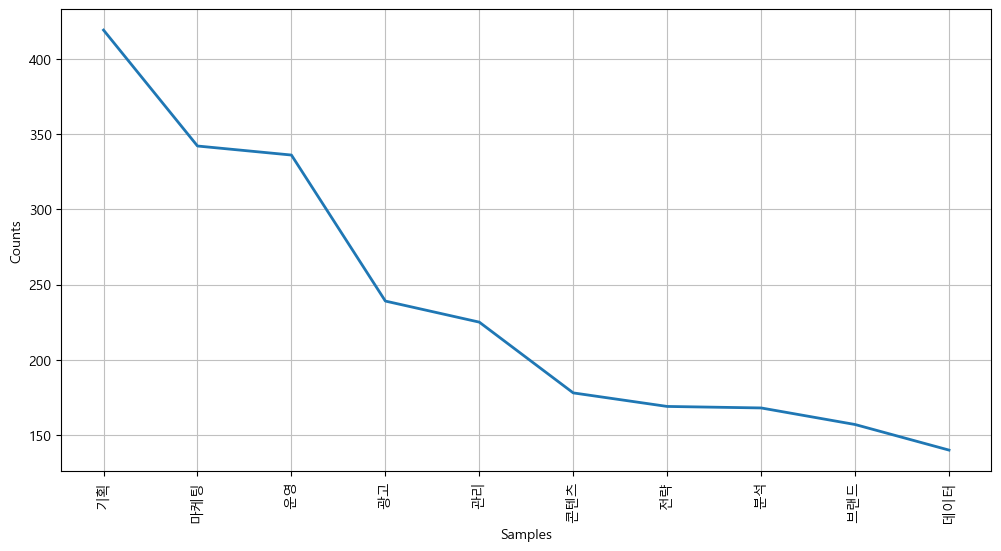

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

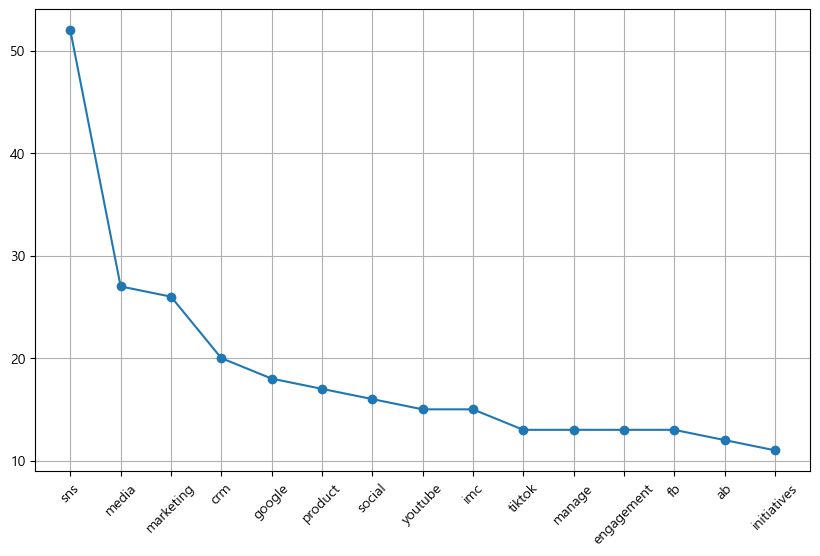

In [11]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['strong','enjoy','pc','journey','work','etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)